In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os



In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
import lightgbm as lgb
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedKFold

In [4]:
!wget --header="Host: datahack-prod.s3.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://datahack.analyticsvidhya.com/contest/janatahack-hr-analytics/" "https://datahack-prod.s3.amazonaws.com/train_file/train_jqd04QH.csv" -c -O 'train_jqd04QH.csv'

--2020-05-10 19:09:53--  https://datahack-prod.s3.amazonaws.com/train_file/train_jqd04QH.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.68
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1817701 (1.7M) [text/csv]
Saving to: ‘train_jqd04QH.csv’

train_jqd04QH.csv   100%[===================>]   1.73M  1.18MB/s    in 1.5s    

2020-05-10 19:09:56 (1.18 MB/s) - ‘train_jqd04QH.csv’ saved [1817701/1817701]



In [5]:
!wget --header="Host: datahack-prod.s3.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://datahack.analyticsvidhya.com/contest/janatahack-hr-analytics/" "https://datahack-prod.s3.amazonaws.com/test_file/test_KaymcHn.csv" -c -O 'test_KaymcHn.csv'

--2020-05-10 19:10:01--  https://datahack-prod.s3.amazonaws.com/test_file/test_KaymcHn.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.56
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1453325 (1.4M) [text/csv]
Saving to: ‘test_KaymcHn.csv’

test_KaymcHn.csv    100%[===================>]   1.39M   979KB/s    in 1.4s    

2020-05-10 19:10:04 (979 KB/s) - ‘test_KaymcHn.csv’ saved [1453325/1453325]



In [6]:
train_df = pd.read_csv("train_jqd04QH.csv")
test_df = pd.read_csv("test_KaymcHn.csv")

In [7]:
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [8]:
test_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65


In [9]:
train_df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [10]:
all_data = pd.concat([train_df, test_df])
all_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0.0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0.0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0.0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0.0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1.0


#### Mapped features like company_size, company_type, last_new_job and exas integers to keep the order intact.All other categorical features were one hot encoded

In [11]:
company_size_map = {'<10':0, '10/49':1, '50-99':2, '100-500':3, '500-999':4, '1000-4999':5, '5000-9999':6, '10000+':7}
all_data["company_size"] = all_data["company_size"].map(company_size_map)

In [12]:
last_new_job_map = {"never":0, "1":1, "2":2, "3":3, "4":4, ">4":5}
all_data["last_new_job"] = all_data["last_new_job"].map(last_new_job_map)

In [13]:
experience_map = {"<1":0, "1":1, "2":2, "3":3, "4":4, "5":5, "6":6, 
                  "7":7, "8":8, "9":9, "10":10, "11":11, "12":12, "13":13, 
                  "14":14, "15":15, "16":16, "17":17, "18":18, "19":19, 
                  "20":20, ">20":21}
all_data["experience"] = all_data["experience"].map(experience_map)

In [14]:
cat_cols = ["gender", "relevent_experience", "enrolled_university", "education_level", "major_discipline", "company_type"]
all_data = pd.get_dummies(all_data, columns=cat_cols)

In [15]:
all_data.head()

,enrollee_id,city,city_development_index,experience,company_size,last_new_job,training_hours,target,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,23798,city_149,0.689,3.0,3.0,1.0,106,0.0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,29166,city_83,0.923,14.0,0.0,1.0,69,0.0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,46,city_16,0.910,6.0,2.0,2.0,4,0.0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,18527,city_64,0.666,14.0,2.0,1.0,26,0.0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,21751,city_100,0.887,8.0,NaN,2.0,88,1.0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [16]:
train_len = train_df.shape[0]
test_len = test_df.shape[0]
train_df = all_data[:train_len]
test_df = all_data[train_len:]

In [17]:
train_df.shape, test_df.shape

((18359, 33), (15021, 33))

In [ ]:
#### fea

In [24]:
# Removed features that were redundant or were less important
features = [col for col in train_df.columns if col not in ["enrollee_id", "city", "target", "major_discipline_Other", "major_discipline_Business Degree", "major_discipline_No Major", "major_discipline_Arts", "company_type_Other", "gender_Other"]]
target = train_df["target"]

In [25]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.5,
    'boost': 'rf',
    'feature_fraction': 0.7,
    'learning_rate': 0.001,
    'max_depth': 8,  
    'metric':'auc',
    'num_leaves': 54,
    'min_data_in_leaf':40,
    'objective': 'binary',
    'scale_pos_weight':2,
    # 'device':'gpu',
    'verbosity': 1
}


#### 5 Fold lightgbm

In [26]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=44000)
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
feature_importance_df = pd.DataFrame()
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 1000000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 1000)
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(sklearn.metrics.roc_auc_score(target, oof)))

Fold 0
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.730129	valid_1's auc: 0.670848
Early stopping, best iteration is:
[327]	training's auc: 0.729101	valid_1's auc: 0.671702
Fold 1
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.733156	valid_1's auc: 0.645308
Early stopping, best iteration is:
[50]	training's auc: 0.730109	valid_1's auc: 0.651878
Fold 2
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.727441	valid_1's auc: 0.693028
Early stopping, best iteration is:
[236]	training's auc: 0.726894	valid_1's auc: 0.694209
Fold 3
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.729695	valid_1's auc: 0.673882
Early stopping, best iteration is:
[474]	training's auc: 0.729142	valid_1's auc: 0.675258
Fold 4
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.73412	valid_1's auc: 0.642157
Early stoppi

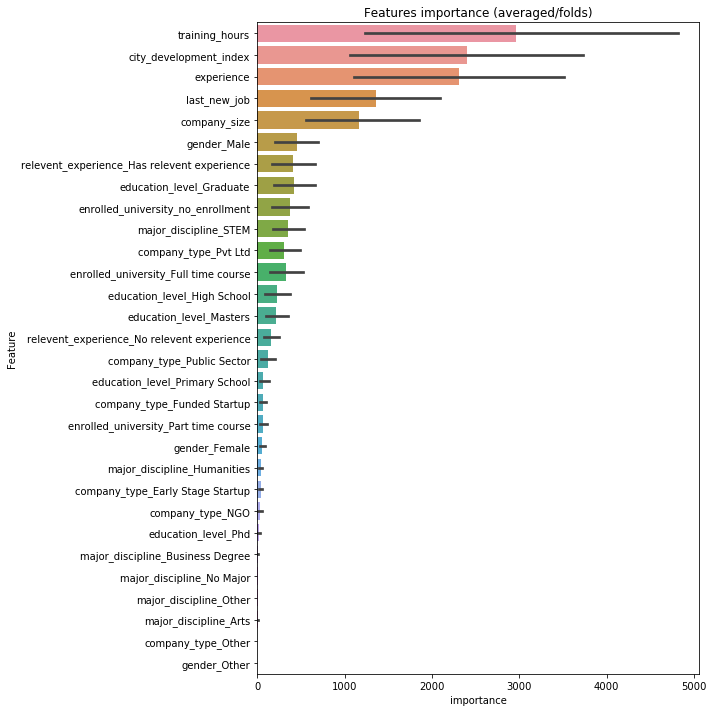

In [22]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(10,10))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.savefig('FI.png')

In [27]:
import catboost as cb
features = [col for col in train_df.columns if col not in ["enrollee_id", "city", "target"]]
cb1 = cb.CatBoostClassifier(iterations=10000, learning_rate=0.01, loss_function='Logloss',
                           bootstrap_type='Bernoulli', depth=6, rsm= 0.65, subsample=0.8, random_seed=4, scale_pos_weight=1)

#### 5 Fold catboost

In [29]:
feature_importance_df = pd.DataFrame()
oof_cat = np.zeros(len(train_df))
predictions_cat = np.zeros(len(test_df))
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=2019)

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = train_df.iloc[trn_idx][features]
    trn_label = target.iloc[trn_idx]
    val_data = train_df.iloc[val_idx][features]
    val_label = target.iloc[val_idx]
    
    cb1.fit(X=trn_data, y=trn_label,eval_set=[(trn_data, trn_label), (val_data, val_label)],verbose=1000,early_stopping_rounds=300)
    
    oof_cat[val_idx] = cb1.predict_proba(val_data)[:,1]
    predictions_cat += cb1.predict_proba(test_df[features])[:,1]/folds.get_n_splits()
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = cb1.feature_importances_
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

Fold 0
0:	learn: 0.6861685	test: 0.6861685	test1: 0.6861906	best: 0.6861906 (0)	total: 10.8ms	remaining: 1m 48s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.3726461298
bestIteration = 642

Shrink model to first 643 iterations.
Fold 1
0:	learn: 0.6861671	test: 0.6861671	test1: 0.6861822	best: 0.6861822 (0)	total: 10.1ms	remaining: 1m 40s
1000:	learn: 0.3457938	test: 0.3457938	test1: 0.3648765	best: 0.3648198 (976)	total: 9.86s	remaining: 1m 28s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.3645415405
bestIteration = 1211

Shrink model to first 1212 iterations.
Fold 2
0:	learn: 0.6861973	test: 0.6861973	test1: 0.6861998	best: 0.6861998 (0)	total: 9.9ms	remaining: 1m 38s
1000:	learn: 0.3456932	test: 0.3456932	test1: 0.3675339	best: 0.3674767 (952)	total: 10.4s	remaining: 1m 33s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.3674766819
bestIteration = 952

Shrink model to first 953 iterations.
Fold 3
0:	learn: 0.6861819	t

#### Choosing best weights for blending

In [31]:
max_roc = -1
max_weight = 0
max_ensemble_oof  = 0
weights_list = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
for weight in weights_list:
#     print(weight, 1.0-weight)
    ensemble_oof = weight*oof_cat + (1-weight)*oof
    roc_score = sklearn.metrics.roc_auc_score(target,ensemble_oof)
#     print(weight, roc_score)
    if roc_score > max_roc:
        max_ensemble_oof = ensemble_oof
        max_roc = roc_score
        max_weight = weight
print("The best weights for blending is {0} with AUC {1}".format(max_weight, max_roc))

In [34]:
test_df["target"] =weight*predictions_cat + (1-weight)*predictions
result = test_df[["enrollee_id", "target"]]
result.to_csv("submission-cat-0.66-9.csv", index=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
